# Distribution of teh subgraphs

In this notebook we superficially investigate teh distributions of the graphlests in graphs coming from different distributions. 
Moreover, we analyze how the permutation consisting in deletein and edge, creating it or both influance the distribution of the graphlets.  

In [1]:
# imports
import os
import sys
# add to the path the source files
sys.path.append(os.path.dirname(os.getcwd()))

from networkx.generators import random_regular_graph, gnp_random_graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.dataset.counting_algorithm import subgraph_counting, subgraph_counting_all, subgraph_listing_all
from src.dataset.graph_permutation import GraphPermutation

In [2]:
def print_statistics(vec, name):
    graphlets = [f'g3_{i}' for i in range(1, 3)] + [f'g4_{i}' for i in range(1, 7)] + ['star']
    print("##############################################################")
    print(f"{name} of the counts:")
    print("##############################################################")
    print(pd.DataFrame(data = vec, index = [1], columns=graphlets))
    print("\n")

# Statistics of the counts

Generate the synthetic dataset and then analythe the counts:
- cont the substructure on the original graphs
- we perform 3 types of perturbation: edge delition, addition and replacement and count the substructures.
- compute the difference (absolute and relative) between the coutns of the original graphs and the counts of the perturbed ones.

**Remark:** absolute and relative difference stands for respectively:
- $|count_{original} - count_{perturbed}|$

- $\dfrac{|count_{original} - count_{perturbed}|}{count_{original}}$

Of these difference we analyse the statistics by computing the mean and the variance.

In [9]:
m = 100 # size of the dataset
n = 10 # size of the graphs
p = 0.4 # probability of the edge creation
d = 6


graphs = []
for i in range(m):
    #graphs.append(random_regular_graph(n=n, d=d, seed = i))
     graphs.append(gnp_random_graph(n=n, p=p, directed=False, seed = 2*i))

# compute the statistics on the counts
counts = np.zeros((m, 9)) # every colum contains all the counts for a specific graphlet
for i, graph in enumerate(
    graphs):
    result = subgraph_counting_all(graph)
    counts[i,:] = np.array(list(result.values()))

mean = np.mean(counts, axis=0, keepdims = True)
var = np.std(counts, axis = 0, keepdims = True)
median = np.median(counts, axis=0, keepdims=True)
print(np.max(counts, axis = 0))
print(np.min(counts, axis=0))


[ 24.  58.   9.  36.  51.  32.  24.  60. 183.]
[ 1. 16.  0.  0.  2.  3.  0. 12.  5.]


In [10]:
print_statistics(mean, "Mean")
print_statistics(var, "Variance")
print_statistics(median, "Median")

##############################################################
Mean of the counts:
##############################################################
   g3_1   g3_2  g4_1  g4_2   g4_3   g4_4  g4_5   g4_6   star
1  7.37  34.97  0.75  7.38  22.62  12.23  5.95  35.73  52.61


##############################################################
Variance of the counts:
##############################################################
       g3_1      g3_2      g4_1      g4_2       g4_3      g4_4      g4_5  \
1  4.719439  8.668858  1.645448  7.487029  11.278103  5.823839  4.231725   

        g4_6       star  
1  10.892066  32.069579  


##############################################################
Median of the counts:
##############################################################
   g3_1  g3_2  g4_1  g4_2  g4_3  g4_4  g4_5  g4_6  star
1   6.0  35.5   0.0   5.0  21.0  11.0   5.0  36.5  44.0




Investigate if the counts remain almost constant after a permutation

In [5]:
graph_permutation = GraphPermutation()
#permutate with deletion
del_graphs = []
add_graphs = []
rep_graphs = []
for graph in graphs:
    del_graphs.append(graph_permutation.edge_deletion(graph))
    add_graphs.append(graph_permutation.edge_creation(graph))
    rep_graphs.append(graph_permutation.edge_replacement(graph))

# count the substructures

###########################################
############# Deleted #####################
###########################################

counts_del = np.zeros((m, 9)) # every colum contains all the counts for a specific graphlet
for i, graph in enumerate(del_graphs):
    result = subgraph_counting_all(graph)
    counts_del[i,:] = np.array(list(result.values()))

dif_del = np.abs(counts-counts_del)
relative_dif_del = dif_del/counts
mean_dif_del = np.mean(dif_del, axis=0, keepdims = True)
relative_mean_dif_del = np.mean(relative_dif_del, axis=0, keepdims = True)
var_dif_del = np.var(dif_del, axis = 0, keepdims = True)
relative_var_diff_del = np.var(relative_dif_del, axis=0, keepdims=True)

###########################################
############# Created #####################
###########################################

counts_add = np.zeros((m, 9)) # every colum contains all the counts for a specific graphlet
for i, graph in enumerate(add_graphs):
    result = subgraph_counting_all(graph)
    counts_add[i,:] = np.array(list(result.values()))

dif_add = np.abs(counts-counts_add)
relative_dif_add = dif_add/counts
mean_dif_add = np.mean(dif_add, axis=0, keepdims = True)
relative_mean_dif_add = np.mean(relative_dif_add, axis=0, keepdims = True)
var_dif_add = np.var(dif_add, axis = 0, keepdims = True)
relative_var_diff_add = np.var(relative_dif_add, axis=0, keepdims=True)


###########################################
############# Replaced #####################
###########################################

counts_rep = np.zeros((m, 9)) # every colum contains all the counts for a specific graphlet
for i, graph in enumerate(rep_graphs):
    result = subgraph_counting_all(graph)
    counts_rep[i,:] = np.array(list(result.values()))

dif_rep = np.abs(counts-counts_rep)
relative_dif_rep = dif_rep/counts
mean_dif_rep = np.mean(dif_rep, axis=0, keepdims = True)
relative_mean_dif_rep = np.mean(relative_dif_rep, axis=0, keepdims = True)
var_dif_rep = np.var(dif_rep, axis = 0, keepdims = True)
relative_var_diff_rep = np.var(relative_dif_rep, axis=0, keepdims=True)

/tmp/ipykernel_11175/2468502168.py:23: RuntimeWarning: invalid value encountered in divide
  relative_dif_del = dif_del/counts
/tmp/ipykernel_11175/2468502168.py:39: RuntimeWarning: divide by zero encountered in divide
  relative_dif_add = dif_add/counts
/tmp/ipykernel_11175/2468502168.py:39: RuntimeWarning: invalid value encountered in divide
  relative_dif_add = dif_add/counts
/tmp/ipykernel_11175/2468502168.py:56: RuntimeWarning: divide by zero encountered in divide
  relative_dif_rep = dif_rep/counts
/tmp/ipykernel_11175/2468502168.py:56: RuntimeWarning: invalid value encountered in divide
  relative_dif_rep = dif_rep/counts


In [6]:
print_statistics(mean_dif_del, "Mean difference deleted")
print_statistics(var_dif_del, "Variance difference deleted")
print_statistics(relative_mean_dif_del, "Mean Relative difference deleted")
print_statistics(relative_var_diff_del, "Variance Relative difference deleteted")


##############################################################
Mean difference deleted of the counts:
##############################################################
   g3_1  g3_2  g4_1  g4_2   g4_3   g4_4  g4_5   g4_6   star
1  1.08  7.79  0.11  2.32  12.91  12.48  3.54  35.34  29.53


##############################################################
Variance difference deleted of the counts:
##############################################################
     g3_1    g3_2    g4_1    g4_2     g4_3     g4_4    g4_5      g4_6  \
1  1.1336  7.5659  0.1779  9.2576  95.2819  80.0696  8.3684  216.4444   

       star  
1  294.9491  


##############################################################
Mean Relative difference deleted of the counts:
##############################################################
       g3_1      g3_2  g4_1      g4_2      g4_3      g4_4      g4_5      g4_6  \
1  0.032464  0.019753   NaN  0.053231  0.037111  0.027681  0.040757  0.026172   

       star  
1  0.032428  




In [7]:
print_statistics(mean_dif_add, "Mean difference created")
print_statistics(var_dif_add, "Variance difference added")
print_statistics(relative_mean_dif_add, "Mean Relative difference added")
print_statistics(relative_var_diff_add, "Variance Relative difference added")

##############################################################
Mean difference created of the counts:
##############################################################
   g3_1  g3_2  g4_1  g4_2   g4_3   g4_4  g4_5   g4_6   star
1  0.98   8.1  0.09  1.86  12.61  12.84   4.2  36.82  28.61


##############################################################
Variance difference added of the counts:
##############################################################
     g3_1  g3_2    g4_1    g4_2     g4_3     g4_4  g4_5      g4_6      star
1  0.7196  7.87  0.1019  4.7204  75.4379  96.7744   9.2  231.2676  203.2579


##############################################################
Mean Relative difference added of the counts:
##############################################################
       g3_1      g3_2  g4_1      g4_2      g4_3      g4_4      g4_5     g4_6  \
1  0.033427  0.020313   NaN  0.057262  0.039325  0.027644  0.047638  0.02666   

       star  
1  0.032054  


#############################

In [8]:
print_statistics(mean_dif_rep, "Mean difference Replaced")
print_statistics(var_dif_rep, "Variance difference Replaced")
print_statistics(relative_mean_dif_rep, "Mean relative difference Replaced")
print_statistics(relative_var_diff_rep, "Variance Relative difference repalced")

##############################################################
Mean difference Replaced of the counts:
##############################################################
   g3_1  g3_2  g4_1  g4_2   g4_3   g4_4  g4_5   g4_6   star
1  1.09  3.04  0.21  2.75  10.41  11.13  3.17  15.85  17.34


##############################################################
Variance difference Replaced of the counts:
##############################################################
     g3_1    g3_2    g4_1    g4_2     g4_3     g4_4    g4_5      g4_6  \
1  0.8819  4.9384  0.2659  8.5675  58.5819  77.7531  9.8411  199.6675   

       star  
1  217.8044  


##############################################################
Mean relative difference Replaced of the counts:
##############################################################
       g3_1      g3_2  g4_1      g4_2      g4_3      g4_4      g4_5      g4_6  \
1  0.034889  0.007587   NaN  0.071282  0.032422  0.024321  0.035796  0.011788   

       star  
1  0.019092  

# Progressive deletion

Behaviour of the count of a specific substructure after progressive deletion of an edge until the graphs has only disconnected nodes.

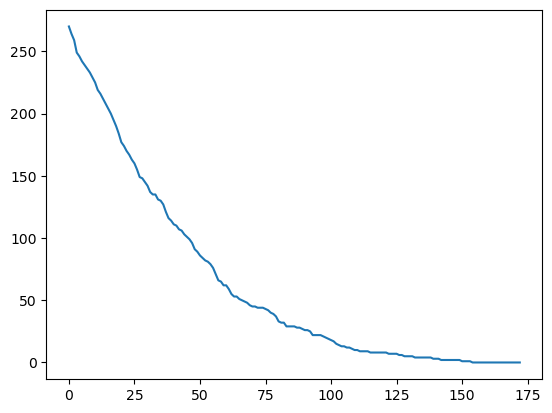

In [9]:
n = 30
p = 0.4
subgraph_type = 'g31'

graph = gnp_random_graph(n=n, p=p, directed=False, seed = 3)
num_edges = len(list(nx.edges(graph)))
counts = [subgraph_counting(graph, subgraph_type)]
for i in range(num_edges):
    graph = graph_permutation.edge_deletion(graph)
    counts.append(subgraph_counting(graph, subgraph_type))
#plot the results
x = list(range(0, num_edges +1))
plt.plot(x, counts)

# Distribution of a graphlet

Distribution of the counts of a graphlet across different graphs coming from the same distribution.

(array([ 4.,  3.,  7., 23., 27., 37., 51., 58., 70., 72., 82., 81., 93.,
        53., 58., 41., 51., 39., 28., 31., 23., 16., 15., 15.,  5.,  2.,
         2.,  3.,  3.,  1.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.]),
 array([ 8.   ,  9.975, 11.95 , 13.925, 15.9  , 17.875, 19.85 , 21.825,
        23.8  , 25.775, 27.75 , 29.725, 31.7  , 33.675, 35.65 , 37.625,
        39.6  , 41.575, 43.55 , 45.525, 47.5  , 49.475, 51.45 , 53.425,
        55.4  , 57.375, 59.35 , 61.325, 63.3  , 65.275, 67.25 , 69.225,
        71.2  , 73.175, 75.15 , 77.125, 79.1  , 81.075, 83.05 , 85.025,
        87.   ]),
 <BarContainer object of 40 artists>)

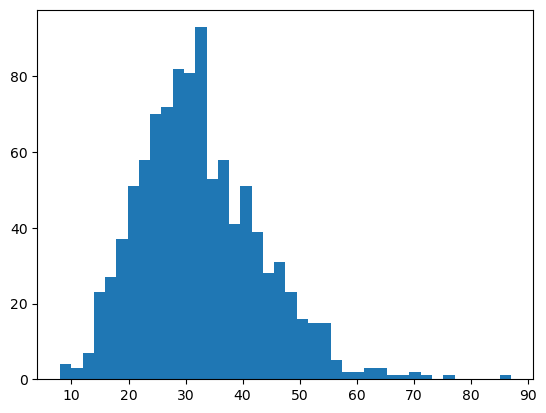

In [10]:
subgraph_size = 4
subgraph_id = 2

n = 30
p = 0.2
m = 1000 # number of generated graphs
counts = []
for i in range(m):
    graph = gnp_random_graph(n=n, p=p, directed=False)
    counts.append(subgraph_counting(graph, subgraph_type))

#plot the results
plt.hist(counts, bins=40)

## Lipscitz constant of graph perturbations

How much can change the subgraph count after a single edge perturbation. (worse case)

In [3]:
from copy import deepcopy
from tqdm import tqdm
import dgl

import networkx as nx
def generate_egonet(graph: nx.Graph, root: int, depth: int):
    """Generates an egonet of given depth starting from the root node"""
    # to generate the egonet we look for neighbours iteratively
    graph_copy = deepcopy(graph)
    egonet = [root]
    neighbors = [root]
    visited = {root} # here we need to search for an element
    for i in range(depth):
        queue = neighbors
        neighbors = []
        for node in queue:
            for neighbor in graph_copy.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    neighbors.append(neighbor)
        if neighbors == []:
            break
        egonet.extend(neighbors)
    return egonet

dgl_graphs, counts = dgl.load_graphs("/nfs/students/campi/dataset/training/test_5000_sbm_30.bin")
graphs = []
for i in range(100):
    graphs.append(nx.Graph(dgl.to_networkx(dgl_graphs[i])))

#subgraphs = list(counts.keys())
subgraphs = ['Triangle',  '2-Path', '4-Clique', 'Chordal cycle', 'Tailed triangle', '3-Star', '4-Cycle', '3-Path']
changes = {}
preserving = {}
sub_preserving = {}
for subgraph in subgraphs:
    changes[subgraph] = []
    preserving[subgraph] = 0
    sub_preserving[subgraph] = 0



#analyze all possible perturbations
for graph in tqdm(graphs):
    count = subgraph_counting_all(graph=graph)
    for edge in nx.edges(graph):
        perturbed_graph = deepcopy(graph)
        perturbed_graph.remove_edge(*edge)
        # recompute the substructure coutns of the perturbed graph
        egonet = generate_egonet(graph, edge[0], 2)
        subgraph = graph.subgraph(egonet)
        subgraph_count = subgraph_counting_all(graph=subgraph)
        subgraphs_list = subgraph_listing_all(graph=subgraph)
        perturbed_subgraph = perturbed_graph.subgraph(egonet)
        perturbed_subgraph_count =  subgraph_counting_all(graph=perturbed_subgraph)
        perturbed_subgraphs_list = subgraph_listing_all(graph=perturbed_subgraph)
        for subgraph in subgraphs:
            changes[subgraph].append(abs(perturbed_subgraph_count[subgraph] - subgraph_count[subgraph]))
            preserving[subgraph] += perturbed_subgraph_count[subgraph] == subgraph_count[subgraph]
            sub_preserving[subgraph] += perturbed_subgraphs_list[subgraph] == subgraphs_list[subgraph]
    
    for edge in nx.non_edges(graph):
        perturbed_graph = deepcopy(graph)
        perturbed_graph.add_edge(*edge)
        # recompute the substructure coutns of the perturbed graph
        egonet = generate_egonet(perturbed_graph, edge[0], 3)
        subgraph = graph.subgraph(egonet)
        subgraph_count = subgraph_counting_all(graph=subgraph)
        subgraphs_list = subgraph_listing_all(graph=subgraph)
        perturbed_subgraph = perturbed_graph.subgraph(egonet)
        perturbed_subgraph_count =  subgraph_counting_all(graph=perturbed_subgraph)
        perturbed_subgraphs_list = subgraph_listing_all(graph=perturbed_subgraph)
        for subgraph in subgraphs:
            changes[subgraph].append(abs(perturbed_subgraph_count[subgraph] - subgraph_count[subgraph]))
            preserving[subgraph] += perturbed_subgraph_count[subgraph] == subgraph_count[subgraph]
            sub_preserving[subgraph] += perturbed_subgraphs_list[subgraph] == subgraphs_list[subgraph]

for i, subgraph in enumerate(subgraphs):
    changes[subgraph] = max(changes[subgraph])
    preserving[subgraph] = preserving[subgraph]/len(graphs)
    sub_preserving[subgraph] = sub_preserving[subgraph]/len(graphs)

print('Lipschitz constant')
display(changes)
print('Count preserving')
display(preserving)
print('Substructures preserving')
display(sub_preserving)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [36:38<00:00, 21.98s/it]

Lipschitz constant


{'Triangle': 7,
 '2-Path': 17,
 '4-Clique': 6,
 'Chordal cycle': 19,
 'Tailed triangle': 55,
 '3-Star': 70,
 '4-Cycle': 16,
 '3-Path': 92}

Count preserving


{'Triangle': 205.32,
 '2-Path': 1.69,
 '4-Clique': 410.93,
 'Chordal cycle': 244.04,
 'Tailed triangle': 27.94,
 '3-Star': 12.24,
 '4-Cycle': 88.98,
 '3-Path': 1.64}

Substructures preserving


{'Triangle': 205.32,
 '2-Path': 0.02,
 '4-Clique': 410.93,
 'Chordal cycle': 241.82,
 'Tailed triangle': 27.62,
 '3-Star': 1.6,
 '4-Cycle': 74.34,
 '3-Path': 0.62}